In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
# import dataset from data folder
df = pd.read_csv('./DATA/fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.isna().sum()

price       0
feature1    0
feature2    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


<Figure size 800x600 with 0 Axes>

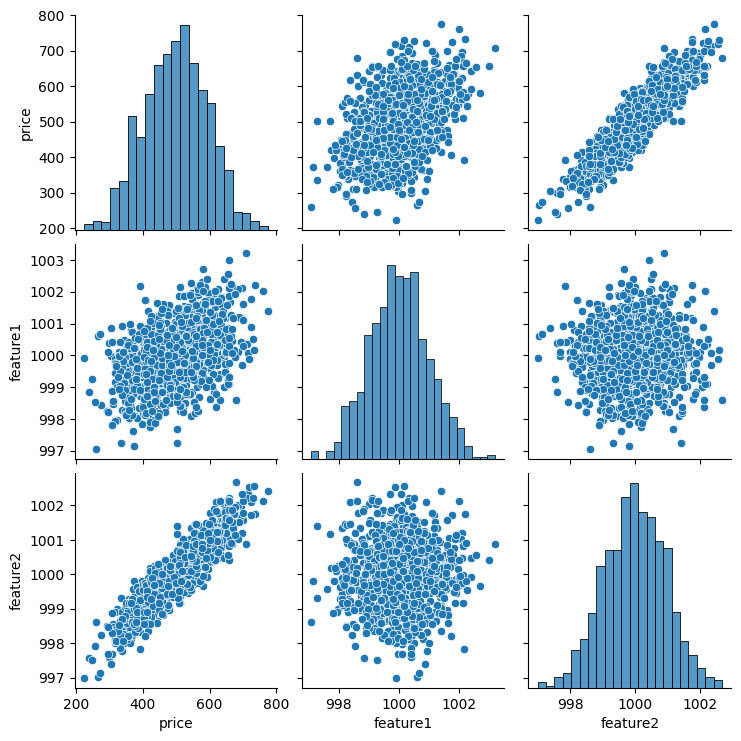

In [6]:
# pairplot of view distribution
plt.figure(figsize=(8,6))
sns.pairplot(df)
plt.show()

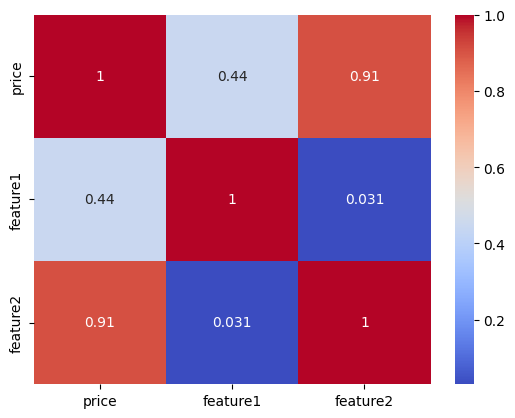

In [7]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [8]:
df.columns

Index(['price', 'feature1', 'feature2'], dtype='object')

In [9]:
df.loc[:,['feature1', 'feature2']]

,feature1,feature2
0,999.787558,999.766096
1,998.861615,1001.042403
2,1000.070267,998.844015
3,999.952251,1000.440940
4,1000.446011,1000.338531
...,...,...
995,1000.018988,999.672732
996,998.855379,1000.020026
997,1001.451646,998.847606
998,1000.771023,998.562851


In [10]:
df[['feature1', 'feature2']]

,feature1,feature2
0,999.787558,999.766096
1,998.861615,1001.042403
2,1000.070267,998.844015
3,999.952251,1000.440940
4,1000.446011,1000.338531
...,...,...
995,1000.018988,999.672732
996,998.855379,1000.020026
997,1001.451646,998.847606
998,1000.771023,998.562851


In [11]:
# define x and y and split into train and test sets
X = df.drop('price', axis=1).values
y = df['price'].values


# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# standardize the X input variable
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)


X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  `MinMaxScaler` doesn't reduce the effect of outliers, but it linearly
 |  scales them down into a fixed range, where the largest occurring data point
 |  corresponds to the maximum value and the smallest one 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
model = Sequential()

# input layer with 4 neurons and relu activation function
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))

# final ouputer layer makes predices
model.add(Dense(1))

# compile the model
model.compile(optimizer='rmsprop', loss='mse')

In [16]:
model.fit(x = X_train, y = y_train, epochs=250, verbose=1)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 255961.8438
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259512.4844 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252562.5312 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259746.6719 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258380.3594 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252338.4531 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 258500.4375 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 255791.5781 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 258134.7188 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254826.7812 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259136.6719 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254119.3125 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 248450.5938 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2

Text(0.5, 1.0, 'Loss vs Epochs')

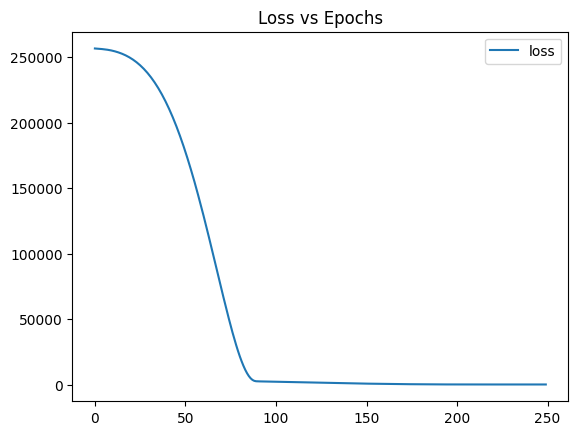

In [17]:
model.history.history
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
plt.title('Loss vs Epochs')

In [18]:
# evaluate the model by using mean squared error
model.evaluate(X_test, y_test, verbose=1)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27.6551 


25.831432342529297

In [19]:
# loss of training set
model.evaluate(X_train, y_train, verbose=1)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.1949 


23.980655670166016

In [22]:
# test predictions
test_predictions = model.predict(X_test)
test_predictions[:10]
test_predictions.shape

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


(300, 1)

In [30]:
y_true = pd.DataFrame(y_test, columns=['True Price'])
y_true[:5]

,True Price
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104


In [25]:
predictions = pd.DataFrame(test_predictions, columns=['Predictions'])
predictions[:5]

,Predictions
0,405.970703
1,624.539124
2,593.084534
3,573.152954
4,367.245148


In [36]:
pred_df = pd.concat([y_true, predictions], axis=1)
pred_df.iloc[:5,:]

,True Price,Predictions
0,402.296319,405.970703
1,624.156198,624.539124
2,582.455066,593.084534
3,578.588606,573.152954
4,371.224104,367.245148


In [59]:
# model metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

# metrics of model predictions
mean_squared_error(y_test, test_predictions)
mean_absolute_error(y_test, test_predictions)
r2_score(y_test, test_predictions)

# # print the metrics
# print(f'Mean Squared Error: {mse:.2f}')
# print(f'Mean Absolute Error: {mae:.2f}')
# print(f'R2 Score: {r2:.2f}')


0.9970619492827171

In [60]:
pred_df.describe()

,True Price,Predictions
count,300.000000,300.000000
mean,500.375339,501.283752
std,93.922502,94.132874
min,246.739720,251.260010
25%,435.220788,437.036392
50%,502.979961,504.463165
75%,567.451939,568.463760
max,722.263944,722.094177


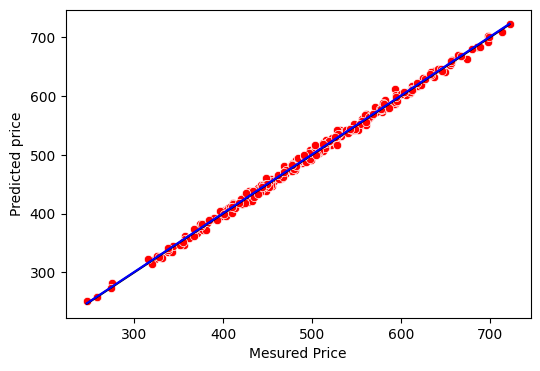

In [61]:
fig, ax = plt.subplots(figsize=(6,4))
# ax.plot(pred_df['True Price'], pred_df['Predictions'], 'o')
z = np.polyfit(pred_df['True Price'], pred_df['Predictions'], 1)

sns.scatterplot(x='True Price', y='Predictions', data=pred_df, ax=ax, color='red')
sns.lineplot(x='True Price', y='True Price', data=pred_df, ax=ax, color='black')
sns.lineplot(x='True Price', y=z[0]*pred_df['True Price']+z[1], data=pred_df, ax=ax, color='blue')
ax.set_xlabel('Mesured Price')
ax.set_ylabel('Predicted price')
plt.show()


In [62]:
# predict on brand new set of data
new_gem = [[1000, 899]]
gemx = [100, 200]

print(new_gem)

[[1000, 899]]


In [63]:
new_gem[0]

[1000, 899]

In [64]:
# scale new gem data
new_gem_scaled = scaler.transform(new_gem)
model.predict(new_gem_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[2.5568457]], dtype=float32)

In [65]:
# save model for later
from tensorflow.keras.models import load_model

model.save('gem_model.h5')

In [66]:
later_model = load_model('gem_model.h5')

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}